# Data Exploration on TED Talks Dataset from Kaggle

My goal from this exploartion is to find answers for some questions using TED Talks dataset from Kaggel. 
This dataset contains information about conferences that recorded and uploaded to their official website TED.com. 
I will focus to answer these following questions:
- What are the top 10 most watched TED talks?
- What is the most popular month for TED talks' events?
- What is the average length of TED talk?

# Reading and Exploring the Data 

In [18]:
#Import the necessary libraries 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.ticker import ScalarFormatter
%matplotlib inline 

In [19]:
#read csv data 
ted_df = pd.read_csv('ted_main.csv')

In [3]:
# view th top 5 rows
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


# Preparing the Data 

In [5]:
#remove Nan data
ted_df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

We only have 6 rows that have no speaker_occupation, so we can easily remove them. 

In [20]:
ted_df.dropna(inplace=True)

In [7]:
#check
ted_df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In order to answer question #2: What is the most popular month for TED talks' events? we need to convert film_date to date object 

In [21]:
ted_df['film_date']= pd.to_datetime(ted_df['film_date'], unit='s')

In [11]:
#check
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [13]:
#check film_date data type 
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2549
Data columns (total 17 columns):
comments              2544 non-null int64
description           2544 non-null object
duration              2544 non-null int64
event                 2544 non-null object
film_date             2544 non-null datetime64[ns]
languages             2544 non-null int64
main_speaker          2544 non-null object
name                  2544 non-null object
num_speaker           2544 non-null int64
published_date        2544 non-null int64
ratings               2544 non-null object
related_talks         2544 non-null object
speaker_occupation    2544 non-null object
tags                  2544 non-null object
title                 2544 non-null object
url                   2544 non-null object
views                 2544 non-null int64
dtypes: datetime64[ns](1), int64(6), object(10)
memory usage: 357.8+ KB


# Analyzing the Data and Ansewring Questions  

### Q1) What are the top 10 most watched ted talks?

In [22]:
#create dataframe that holds the top 10 and sort it 
top_10= ted_df[['title', 'views']].sort_values(by='views', ascending=False).head(10)

In [23]:
top_10

,title,views
0,Do schools kill creativity?,47227110
1346,Your body language may shape who you are,43155405
677,How great leaders inspire action,34309432
837,The power of vulnerability,31168150
452,10 things you didn't know about orgasm,22270883
1776,How to speak so that people want to listen,21594632
201,My stroke of insight,21190883
5,Why we do what we do,20685401
2114,This is what happens when you reply to spam email,20475972
1416,"Looks aren't everything. Believe me, I'm a model.",19787465


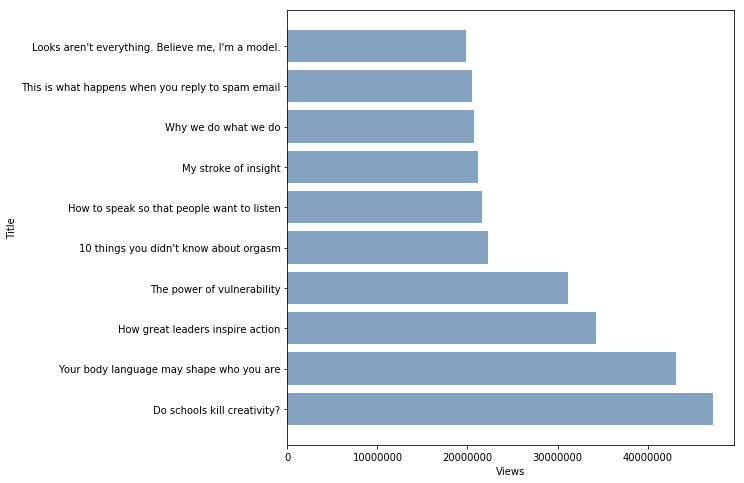

In [44]:
#Visluizing 
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(top_10['title'], top_10['views'],color=(0.2, 0.4, 0.6, 0.6))
ax.set_xlabel("Views")
ax.set_ylabel("Title")
#remove scientific notaion
ax.ticklabel_format(style='plain', axis='x')

From the figure above We can see that the most popluar Ted Talks is "Do schools kill creativity"? which has more than 40 milion views. 

In [138]:
#save figure as png 
fig.savefig('top_10.png')

### What is the most popular month for TED Talks' Conferences ?

In [6]:
#create new column that holds the name of the month using strftime('%b') function 
ted_df['month'] = ted_df['film_date'].apply(lambda x: x.strftime('%b'))

In [83]:
#check
ted_df.head(20)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,Feb
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,Feb
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,Feb
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,Feb
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,2006-02-02,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,Feb
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,2006-02-24,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,Feb
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,2006-02-23,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,Feb
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,2006-02-02,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958,Feb
9,900,"Pastor Rick Warr

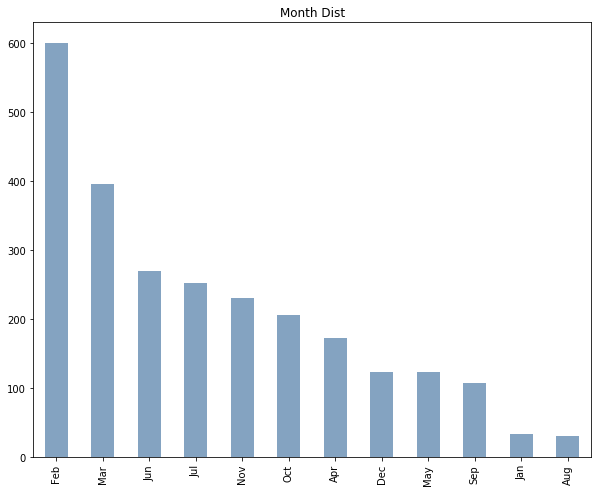

In [119]:
#visluize month distribution  
plt.figure(figsize=(10,8))
ted_df.month.value_counts().plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6))
plt.title('Month Dist')
plt.show()

From the figure we can see that most of Ted events occurred in February where August and January are the least popular 

In [143]:
#save to png 
plt.savefig('months.png')

<Figure size 432x288 with 0 Axes>

###  What is the  Average Length of Ted Talk?

In [7]:
#convert duration in seconds to be in minutes 
ted_df['minutes'] = ted_df['duration'].apply(lambda x: x/60)

In [9]:
ted_df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,minutes
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,19.400000
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,Feb,16.283333
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,Feb,21.433333
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,Feb,18.600000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,Feb,19.833333


In [142]:
# statistical description 
ted_df['minutes'].describe()

count    2544.000000
mean       13.788607
std         6.230483
min         2.250000
25%         9.645833
50%        14.141667
75%        17.450000
max        87.600000
Name: minutes, dtype: float64

The avrage of ted talks in this dataset is 13.7. and longest ted talk was 87.6 minutes which is more that one hour. 
The shortest talk was 2.25 mintuts.

In [144]:
#new data frame for max , min and mean
length_df = pd.DataFrame(ted_df['minutes'].describe())

In [146]:
#switch between rows and columns 
length_df= new_df.transpose()

In [147]:
length_df.drop(['count','std','25%','50%','75%'], axis=1,inplace=True)

In [149]:
length_df=length_df[['min','mean','max']]

In [150]:
#styling
length_df.style.set_properties(**{'background-color': 'white',                                                   
                                    'color': 'blue',                       
                                    'border-color': 'black'})

,min,mean,max
minutes,2.25,13.7886,87.6


In [152]:
#save this datframe into csv 
length_df.to_csv('Avrage Length.csv')

Information about the longest Ted talk 

In [15]:
ted_df[ted_df['minutes'] == 87.600000]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,minutes
640,101,"Blind river dolphins, reclusive lemurs, a parr...",5256,University of California,2001-05-16,0,Douglas Adams,"Douglas Adams: Parrots, the universe and every...",1,1268762040,"[{'id': 22, 'name': 'Fascinating', 'count': 29...","[{'id': 635, 'hero': 'https://pe.tedcdn.com/im...","Author, satirist","['biodiversity', 'biology', 'comedy', 'humor',...","Parrots, the universe and everything",https://www.ted.com/talks/douglas_adams_parrot...,473220,May,87.6


After some ressearches I found that t is not consider as TED Talks 

Information about the shoortest Ted Ttalk 

In [16]:
ted_df[ted_df['minutes'] == 2.250000]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,month,minutes
239,76,After speaking at TED2007 on elegance in physi...,135,TED2007,2007-03-03,61,Murray Gell-Mann,Murray Gell-Mann: The ancestor of language,1,1213146000,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...",Physicist,"['culture', 'global issues', 'history', 'langu...",The ancestor of language,https://www.ted.com/talks/murray_gell_mann_on_...,785293,Mar,2.25
